### ARIMA Model for Time Series Forecasting

ARIMA stands for autoregressive integrated moving average model and is specified by three order parameters: (p, d, q).

AR(p) Autoregression – a regression model that utilizes the dependent relationship between a current observation and observations over a previous period.An auto regressive (AR(p)) component refers to the use of past values in the regression equation for the time series.

I(d) Integration – uses differencing of observations (subtracting an observation from observation at the previous time step) in order to make the time series stationary. Differencing involves the subtraction of the current values of a series with its previous values d number of times.

MA(q) Moving Average – a model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations. A moving average component depicts the error of the model as a combination of previous error terms. The order q represents the number of terms to be included in the model.
Types of ARIMA Model

ARIMA:Non-seasonal Autoregressive Integrated Moving Averages

SARIMA:Seasonal ARIMA

SARIMAX:Seasonal ARIMA with exogenous variables

Pyramid Auto-ARIMA

here I am goining to use the airline data to predict the number of passangers in a given months/days

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms
import pandas as pd

%matplotlib inline


In [2]:
df_airline = pd.read_csv('airline_passengers.csv')
df_airline.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [3]:
df_airline.describe()

,Thousands of Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [4]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

In [5]:
df_airline.tail()

,Month,Thousands of Passengers
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


In [6]:
# drop the last value which the null value
df_airline.dropna(axis=0, inplace=True)
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

In [7]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    144 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


In [8]:
# convert the month into datetime formate
df_airline['Month'] = pd.to_datetime(df_airline['Month'])

In [9]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [10]:
df_airline.head()

,Month,Thousands of Passengers
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [11]:
# set the index value to datetime
df_airline.set_index('Month', inplace=True)
df_airline.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


<AxesSubplot:xlabel='Month'>

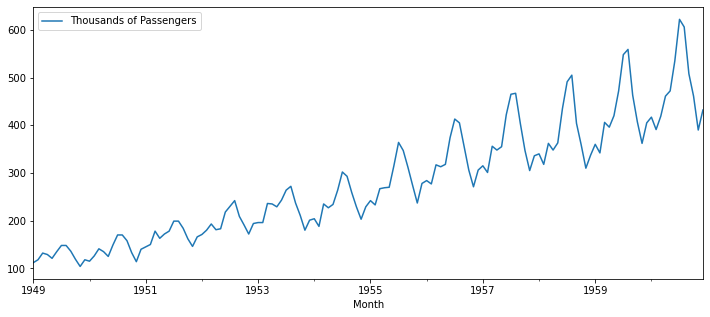

In [12]:
# now this is univariate
df_airline.plot(figsize =(12,5))

**The above data is seasonal and non-stationary**

In [13]:
df_airline.tail()

,Thousands of Passengers
Month,
1960-08-01,606.0
1960-09-01,508.0
1960-10-01,461.0
1960-11-01,390.0
1960-12-01,432.0


<AxesSubplot:xlabel='Month'>

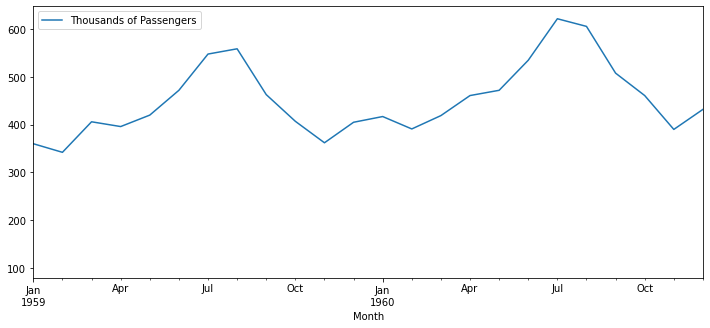

In [14]:
df_airline.plot(figsize =(12,5), xlim = ['1959-01-01', '1960-12-01'])

### dickey fuller test(DFT) (adfuller)
 based on hypotheis: H_0 = null hypotheis(not stationary) and H1: alternate hypothesis(stationary)
### if p<=0.05 then reject the null hypothesis else  fail to reject the null hypothesis

If the p-value from the test is less than some significance level (e.g. α = .05), then we can reject the null hypothesis and conclude that the time series is stationary.


In [15]:
from statsmodels.tsa.stattools import adfuller

In [16]:
def adf_test(series):
    result = adfuller(series)
    print("ADF statistics {}".format(result[0]))
    print("P-Value {}".format(result[1]))
    if result[1]<= 0.05 :
        print("We have strong evidence to reject the null hypothesis. Data has no unit root and it is stationary")
    else:
        print("We don't have strong evidence to reject the null hyposthesis. Time series has a unit root and not stationary")

In [17]:
adf_test(df_airline['Thousands of Passengers'])

ADF statistics 0.8153688792060423
P-Value 0.9918802434376409
We don't have strong evidence to reject the null hyposthesis. Time series has a unit root and not stationary


In [18]:
df_airline['Passengers first difference'] = df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(1)
df_airline.head()

,Thousands of Passengers,Passengers first difference
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,6.0
1949-03-01,132.0,14.0
1949-04-01,129.0,-3.0
1949-05-01,121.0,-8.0


In [19]:
adf_test(df_airline['Passengers first difference'].dropna())

ADF statistics -2.8292668241699874
P-Value 0.05421329028382711
We don't have strong evidence to reject the null hyposthesis. Time series has a unit root and not stationary


In [20]:
# ues technique differencing
df_airline['Passengers second difference'] = df_airline['Passengers first difference']-df_airline['Passengers first difference'].shift(1)
df_airline.head()

,Thousands of Passengers,Passengers first difference,Passengers second difference
Month,,,
1949-01-01,112.0,NaN,NaN
1949-02-01,118.0,6.0,NaN
1949-03-01,132.0,14.0,8.0
1949-04-01,129.0,-3.0,-17.0
1949-05-01,121.0,-8.0,-5.0


In [21]:
adf_test(df_airline['Passengers second difference'].dropna())

ADF statistics -16.384231542468513
P-Value 2.7328918500142026e-29
We have strong evidence to reject the null hypothesis. Data has no unit root and it is stationary


In [22]:
### this is seasonal data so do shifting for 12 months
df_airline['Passengers 12 difference'] = df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(12)
df_airline.head()

,Thousands of Passengers,Passengers first difference,Passengers second difference,Passengers 12 difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN


In [23]:
adf_test(df_airline['Passengers 12 difference'].dropna())

ADF statistics -3.3830207264924805
P-Value 0.011551493085514982
We have strong evidence to reject the null hypothesis. Data has no unit root and it is stationary


<AxesSubplot:xlabel='Month'>

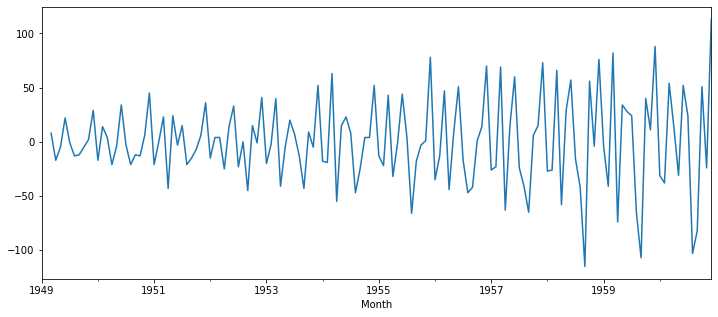

In [93]:
df_airline['Passengers second difference'].plot(figsize =(12,5))

In [24]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

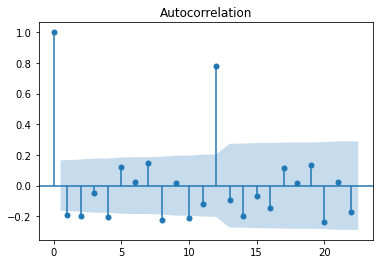

In [25]:
acf = plot_acf(df_airline['Passengers second difference'].dropna())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


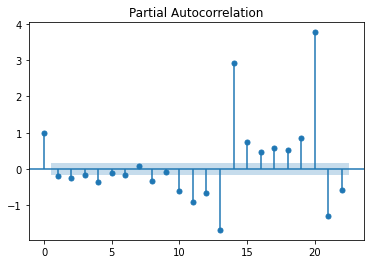

In [28]:
pacf = plot_pacf(df_airline['Passengers second difference'].dropna())

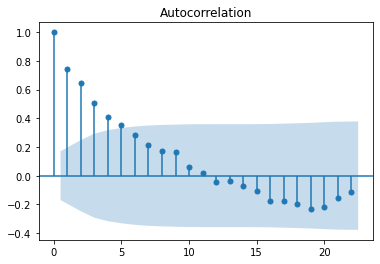

In [26]:
acf12 = plot_acf(df_airline['Passengers 12 difference'].dropna())

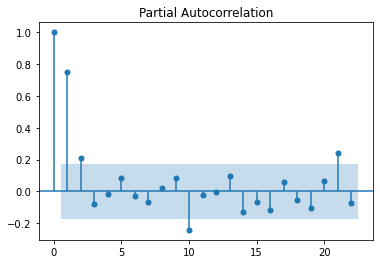

In [29]:
pacf12 = plot_pacf(df_airline['Passengers 12 difference'].dropna())

In [31]:
# slplit train and test
df_airline

,Thousands of Passengers,Passengers first difference,Passengers second difference,Passengers 12 difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1960-08-01,606.0,-16.0,-103.0,47.0
1960-09-01,508.0,-98.0,-82.0,45.0
1960-10-01,461.0,-47.0,51.0,54.0


In [32]:
from datetime import datetime,timedelta
train_dataset_end=datetime(1955,12,1)
test_dataset_end=datetime(1960,12,1)

In [33]:
train_data=df_airline[:train_dataset_end]
test_data=df_airline[train_dataset_end+timedelta(days=1):test_dataset_end]

In [34]:
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

In [246]:
test_data.head()

,Thousands of Passengers,Passengers first difference,Passengers second difference,Passengers 12 difference,Predicted_Arima,pred_sarimax
Month,,,,,,
1956-01-01,284.0,6.0,-35.0,42.0,-18.022564,NaN
1956-02-01,277.0,-7.0,-13.0,44.0,-45.357074,NaN
1956-03-01,317.0,40.0,47.0,50.0,36.623156,NaN
1956-04-01,313.0,-4.0,-44.0,44.0,-13.759669,NaN
1956-05-01,318.0,5.0,9.0,48.0,-23.878997,NaN


In [247]:
train_data.head()

,Thousands of Passengers,Passengers first difference,Passengers second difference,Passengers 12 difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN


### ARIMA model

In [36]:
from statsmodels.tsa.arima_model import ARIMA

In [222]:
# lets start with p=10 d=2 q=12
# p = 10 because of pacf graph for second differencing (d=2) and q=12 because of acf graph
import warnings
warnings.filterwarnings('ignore')

model_arima = ARIMA(train_data['Thousands of Passengers'], order=(4,2,3))

In [223]:
model_Arima_fit = model_arima.fit(disp=0) # this model fits for q=0 why?

In [224]:
model_Arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 ARIMA Model Results                                  
======================================================================================
Dep. Variable:     D2.Thousands of Passengers   No. Observations:                   82
Model:                         ARIMA(4, 2, 3)   Log Likelihood                -367.733
Method:                               css-mle   S.D. of innovations             17.507
Date:                        Wed, 28 Sep 2022   AIC                            753.466
Time:                                14:07:52   BIC                            775.127
Sample:                            03-01-1949   HQIC                           762.163
                                 - 12-01-1955                                         
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -0.0262        nan        nan        nan         nan         nan
ar.L1.D2.Thousands of Passengers    -0.4049        nan        nan        nan         nan         nan
ar.L2.D2.Thousands of Passengers    -0.8833        nan        nan        nan         nan         nan
ar.L3.D2.Thousands of Passengers     0.1217   2.13e-07   5.71e+05      0.000       0.122       0.122
ar.L4.D2.Thousands of Passengers    -0.4709        nan        nan        nan         nan         nan
ma.L1.D2.Thousands of Passengers    -0.2132      0.046     -4.588      0.000      -0.304      -0.122
ma.L2.D2.Thousands of Passengers     0.2132        nan        nan        nan         nan         nan
ma.L3.D2.Thousands of Passengers    -1.0000        nan        nan        nan         nan         nan
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.4977           -0.8674j            1.0000           -0.3329
AR.2           -0.4977           +0.8674j            1.0000            0.3329
AR.3            0.6269           -1.3155j            1.4573           -0.1792
AR.4            0.6269           +1.3155j            1.4573            0.1792
MA.1            1.0000           -0.0000j            1.0000           -0.0000
MA.2           -0.3934           -0.9194j            1.0000           -0.3144
MA.3           -0.3934           +0.9194j            1.0000            0.3144
-----------------------------------------------------------------------------
"""

In [225]:
##prediction
pred_start_date=test_data['Thousands of Passengers'].index[0]
pred_end_date=test_data['Thousands of Passengers'].index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [226]:
pred=model_Arima_fit.predict(start = pred_start_date, end =pred_end_date )
residuals=test_data['Thousands of Passengers']-pred

In [227]:
pred.tail()

1960-08-01   -34.054228
1960-09-01    43.892434
1960-10-01    -9.711294
1960-11-01   -34.305163
1960-12-01    43.777245
Freq: MS, dtype: float64

In [228]:
residuals.head(10)

Month
1956-01-01    302.022564
1956-02-01    322.357074
1956-03-01    280.376844
1956-04-01    326.759669
1956-05-01    341.878997
1956-06-01    326.431075
1956-07-01    430.159741
1956-08-01    436.563523
1956-09-01    310.097966
1956-10-01    320.860507
dtype: float64

<AxesSubplot:ylabel='Density'>

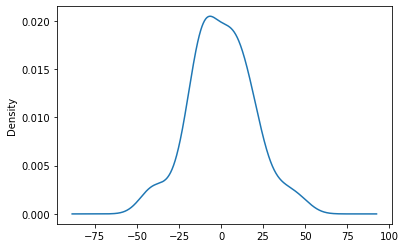

In [229]:
model_Arima_fit.resid.plot(kind='kde')

In [230]:
test_data['Predicted_Arima'] = pred

In [231]:
test_data.head()

,Thousands of Passengers,Passengers first difference,Passengers second difference,Passengers 12 difference,Predicted_Arima
Month,,,,,
1956-01-01,284.0,6.0,-35.0,42.0,-18.022564
1956-02-01,277.0,-7.0,-13.0,44.0,-45.357074
1956-03-01,317.0,40.0,47.0,50.0,36.623156
1956-04-01,313.0,-4.0,-44.0,44.0,-13.759669
1956-05-01,318.0,5.0,9.0,48.0,-23.878997


<AxesSubplot:xlabel='Month'>

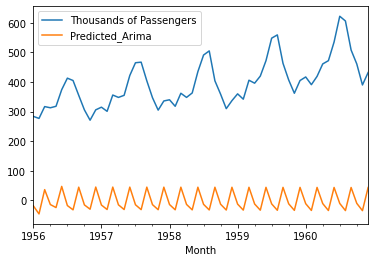

In [232]:
# plotting the graph of passanger and predicted
test_data[['Thousands of Passengers','Predicted_Arima']].plot()

### SARIMAX

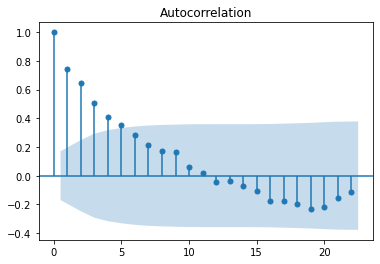

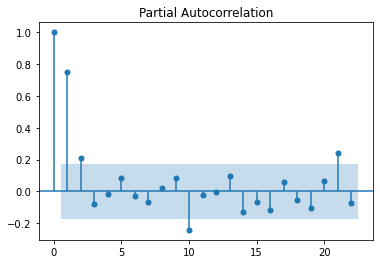

In [189]:
acf12 = plot_acf(df_airline["Passengers 12 difference"].dropna())
pacf12 = plot_pacf(df_airline["Passengers 12 difference"].dropna())

In [190]:
# building the sarimax
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [219]:
model_sarimax = SARIMAX(train_data['Thousands of Passengers'],order=(3,0,5),seasonal_order=(0,1,0,12))

In [220]:
model_sarimax_fit = model_sarimax.fit()

In [221]:
model_sarimax_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:             Thousands of Passengers   No. Observations:                   84
Model:             SARIMAX(3, 0, 5)x(0, 1, [], 12)   Log Likelihood                -265.240
Date:                             Wed, 28 Sep 2022   AIC                            548.481
Time:                                     14:06:33   BIC                            568.971
Sample:                                 01-01-1949   HQIC                           556.638
                                      - 12-01-1955                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5984      0.937      0.638      0.523      -1.239       2.436
ar.L2          0.8311      0.232      3.581      0.000       0.376       1.286
ar.L3         -0.4526      0.894     -0.507      0.613      -2.204       1.299
ma.L1          0.1837      1.164      0.158      0.875      -2.097       2.465
ma.L2         -0.5342      1.262     -0.423      0.672      -3.007       1.938
ma.L3         -0.0986      0.384     -0.257      0.797      -0.851       0.654
ma.L4         -0.1272      0.337     -0.377      0.706      -0.788       0.534
ma.L5          0.2471      0.357      0.693      0.488      -0.452       0.946
sigma2        87.7321     81.097      1.082      0.279     -71.214     246.679
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 2.68
Prob(Q):                              0.88   Prob(JB):                         0.26
Heteroskedasticity (H):               2.05   Skew:                             0.46
Prob(H) (two-sided):                  0.09   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [233]:
pred_sarimax = model_sarimax_fit.predict(start=datetime(1956,6,6),end=datetime(1960,12,1))
residuals = test_data['Thousands of Passengers']-pred_sarimax

In [235]:
residuals.tail()

1960-08-01    145.754411
1960-09-01     85.167128
1960-10-01     79.354588
1960-11-01     47.723706
1960-12-01     51.698564
dtype: float64

<AxesSubplot:xlabel='Month'>

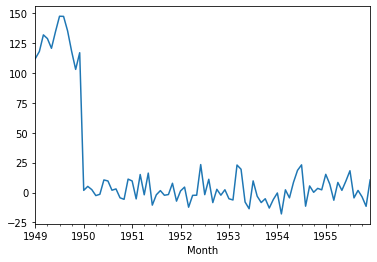

In [236]:
model_sarimax_fit.resid.plot()

<AxesSubplot:ylabel='Density'>

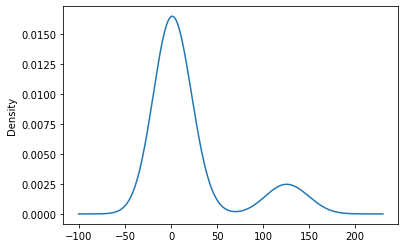

In [237]:
model_sarimax_fit.resid.plot(kind = 'kde')

In [238]:
test_data['pred_sarimax'] = pred_sarimax

In [239]:
test_data.head(3)

,Thousands of Passengers,Passengers first difference,Passengers second difference,Passengers 12 difference,Predicted_Arima,pred_sarimax
Month,,,,,,
1956-01-01,284.0,6.0,-35.0,42.0,-18.022564,NaN
1956-02-01,277.0,-7.0,-13.0,44.0,-45.357074,NaN
1956-03-01,317.0,40.0,47.0,50.0,36.623156,NaN


<AxesSubplot:xlabel='Month'>

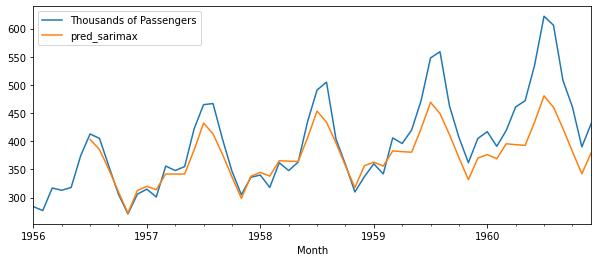

In [244]:
test_data[['Thousands of Passengers','pred_sarimax']].plot(figsize = (10,4))

<AxesSubplot:xlabel='Month'>

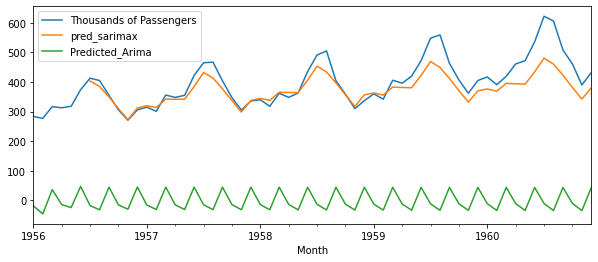

In [245]:
test_data[['Thousands of Passengers','pred_sarimax','Predicted_Arima']].plot(figsize=(10,4))